In [2]:
import sys, os



%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import os
os.environ['R_HOME'] = 'D:/Program Files/R-4.5.0' #@TODO include in some setup file

from simulation_engine.scenarios.iv.binary_iv import BinaryIV
from simulation_engine.scenarios.iv.continuous_iv import ContinuousIV
from simulation_engine.scenarios.iv.base_iv import IVScenario
from simulation_engine.util.plotting_util import PlottingUtil
from simulation_engine.algorithms.causaloptim import Causaloptim
from simulation_engine.algorithms.zhang_bareinboim import ZhangBareinboim
from simulation_engine.algorithms.apid import Apid
from simulation_engine.algorithms.apid_src.src.models.apid import APID

import pandas as pd
pd.set_option('display.max_columns', None)

#disable warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from simulation_engine.algorithms.zaffalonbounds import ZaffalonBounds
from hydra import compose, initialize
from omegaconf import OmegaConf

C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\TUM Workspace\Thesis Workspace\causal-bounds\simulation_engine\..\simulation_engine\algorithms\apid.py:233: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_name=f'config.yaml', config_path='./apid_src/config/')


In [14]:
data = BinaryIV.generate_data_rolling_ate(1000)
binaryIV = BinaryIV('IV Dag', data)
algs = ['PNS_tianpearl', 'ATE_tianpearl', 'ATE_manski']

algorithms = [alg for alg in binaryIV.get_algorithms('ATE') if 'zaffalonbounds' not in alg]
algorithms
runtimes = binaryIV.run(algs)
binaryIV.data

Running PNS_tianpearl...
PNS_tianpearl completed in 0.37 seconds.
Running ATE_tianpearl...
ATE_tianpearl completed in 0.40 seconds.
Running ATE_manski...
ATE_manski completed in 0.43 seconds.
Total runtime: 1.20 seconds.


,seed,intercept_X,intercept_Y,b_Z_X,b_U_X,b_X_Y,b_U_Y,ATE_true,PNS_true,p_Y1_mean,p_Y0_mean,p_U,p_Z,Z,U,X,Y,entropy_Z,entropy_U,entropy_X,entropy_Y,sigma_X,sigma_Y,squasher_X_name,squasher_Y_name,PNS_tianpearl_bound_lower,PNS_tianpearl_bound_upper,PNS_tianpearl_bound_width,PNS_tianpearl_bound_failed,PNS_tianpearl_bound_valid,ATE_tianpearl_bound_lower,ATE_tianpearl_bound_upper,ATE_tianpearl_bound_width,ATE_tianpearl_bound_failed,ATE_tianpearl_bound_valid,ATE_manski_bound_lower,ATE_manski_bound_upper,ATE_manski_bound_width,ATE_manski_bound_failed,ATE_manski_bound_valid
0,10786,0,0,-1.456895,-0.661846,-5.00000,-0.358925,-0.438884,9.251933e-08,1.799221e-07,0.438884,0.417030,0.657760,"[0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, ...",0.914926,0.988149,0.745288,0.950672,1.205959,2.000848,tanh_scaled,probit,0.000000,0.009434,0.009434,False,True,-0.981132,0.065990,1.047122,False,True,-1.000000,0.542429,1.542429,False,True
1,507808,0,0,-1.073550,0.923700,-4.98999,-2.444192,-0.307339,2.976205e-03,4.942119e-03,0.312281,0.305228,0.237486,"[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, ...","[0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, ...","[1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, ...",0.725910,0.871291,0.999988,0.684433,0.976909,0.538858,sigmoid,softplus,0.000000,0.000000,0.000000,False,False,-1.000000,0.269076,1.269076,False,True,-1.000000,0.634538,1.634538,False,True
2,817959,0,0,2.055161,-0.534285,-4.97998,0.550443,-0.518513,3.589033e-03,7.797925e-03,0.526311,0.176010,0.456436,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, ...","[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...","[0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, ...","[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.988149,0.713856,0.910787,0.709765,0.207065,2.061224,tanh_scaled,sigmoid,0.000000,0.026706,0.026706,False,True,-0.946588,-0.079755,0.866833,False,True,-1.000000,0.486829,1.486829,False,True
3,560945,0,0,0.790048,-0.778239,-4.96997,0.527536,-0.447565,4.999181e-03,9.395828e-03,0.456961,0.529435,0.785709,"[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, ...","[1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, ...","[1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0.745288,0.995829,0.995378,0.798350,1.438071,1.121128,sigmoid,softplus,0.000000,0.014815,0.014815,False,True,-0.970370,-0.017391,0.952979,False,True,-1.000000,0.506119,1.506119,False,True
4,112683,0,0,0.519642,0.392291,-4.95996,0.944925,-0.745061,3.875635e-06,2.231831e-05,0.745083,0.740942,0.483091,"[1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, ...","[1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, ...","[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",0.999815,0.814433,0.890851,0.770973,0.594307,1.018354,tanh_scaled,probit,0.000000,0.002890,0.002890,False,True,-0.994220,-0.454545,0.539674,False,True,-1.000000,0.275617,1.275617,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,745583,0,0,-0.662590,-0.506839,4.95996,-2.243369,0.794568,7.946067e-01,9.973358e-01,0.202768,0.580122,0.227955,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...","[0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, ...","[1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, ...",0.760168,0.966078,0.960818,0.999584,1.195065,0.305856,probit,tanh_scaled,0.792208,0.792208,0.000000,False,False,0.584416,1.000000,0.415584,False,True,-0.207792,1.000000,1.207792,False,True
996,823669,0,0,-1.262702,0.830562,4.96997,0.880249,0.482151,4.855218e-01,9.933218e-01,0.511171,0.058449,0.847165,"[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0

    Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Bound Width Invalid Δ (%)
PNS_tianpearl          0.00            27.10          0.1824      0.4040          2.83
ATE_tianpearl          0.00             7.80          0.8086      0.9015          2.91


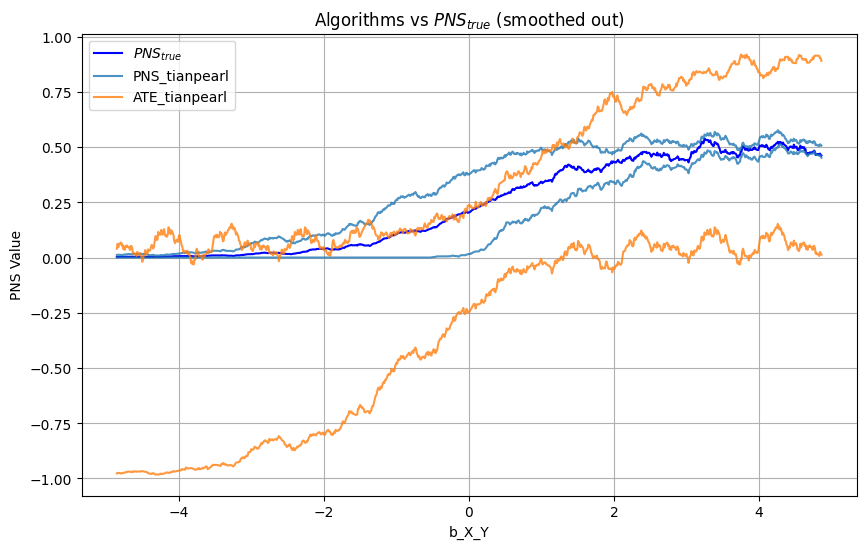

In [ ]:
algorithms = list(runtimes['runtimes'].keys())
ate_algs = binaryIV.get_algorithms('ATE')
# PlottingUtil.print_bound_statistics(binaryIV.data, ate_algs)
PlottingUtil.print_bound_statistics_table(binaryIV.data, algs)
PlottingUtil.plot_smoothed_query_vs_bounds(binaryIV.data, 'ATE', algs, 30, False)

# ContinousIV Test

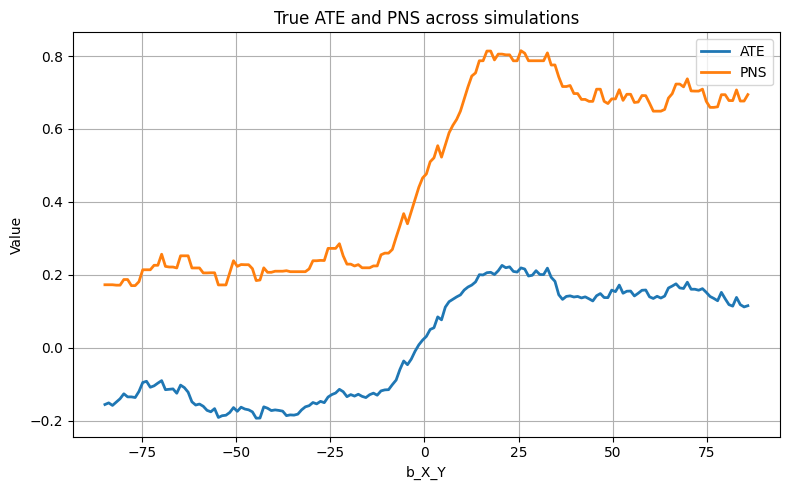

In [3]:
function_keys = [
                "identity",
                "sin",
                "cos",
                "tanh",
                "log1p_abs",
                "exp_neg_sq",
                "sigmoid",
                "exp_clipped"
            ]

data = ContinuousIV.run_rolling_b_X_Y_simulations(
    b_range=(-100, 100), N_points=200, replications=1, n=500,
)
PlottingUtil.plot_ate_pns(data,window=30)

In [32]:
data = ContinuousIV.run_rolling_b_X_Y_simulations(
        b_range=(-10, 10), N_points=2, replications=1, n=500)

contIV = ContinuousIV('IV DAG', data)
results = contIV.run()
# row_dicts = [row.to_dict() for _, row in data.iterrows()]
# ZaffalonBounds._run_zaffalon_from_row_dict(row_dicts[0], 'ATE')

Running ATE_zhangbareinboim...
ATE_zhangbareinboim completed in 0.45 seconds.
Running ATE_causaloptim--binned...
Entering binned Binary IV Scenario for algorithm: ATE_causaloptim
Running ATE_causaloptim...
ATE_causaloptim completed in 3.63 seconds.
Total runtime: 3.63 seconds.
Exiting binned Binary IV Scenario.
ATE_causaloptim--binned completed in 3.63 seconds.
Running ATE_autobound--binned...
Entering binned Binary IV Scenario for algorithm: ATE_autobound
Running ATE_autobound...
Error in AutoBound: Model constraint (c0) contains nonlinear terms that cannot be written to LP format
ATE_autobound completed in 0.28 seconds.
Total runtime: 0.28 seconds.
Exiting binned Binary IV Scenario.
ATE_autobound--binned completed in 0.28 seconds.
Running ATE_zaffalonbounds--binned...
Entering binned Binary IV Scenario for algorithm: ATE_zaffalonbounds
Running ATE_zaffalonbounds...
ATE_zaffalonbounds completed in 15.27 seconds.
Total runtime: 15.27 seconds.
Exiting binned Binary IV Scenario.
ATE_zaff

In [33]:
contIV.binaryIV.data

,seed,b_Z_X,b_U_X,b_X_Y,b_U_Y,p_Z,sigma_X,sigma_Y,sigma_U,g_U_X,g_U_Y,squash_X,squash_Y,g_Y,ATE_true,PNS_true,p_Y1_mean,p_Y0_mean,Z,U,X,Y,Y_max,Y_min,X_max,X_min,X_mean,Y_mean,entropy_Z,entropy_X,ATE_causaloptim_bound_lower,ATE_causaloptim_bound_upper,ATE_causaloptim_bound_valid,ATE_causaloptim_bound_width,ATE_causaloptim_bound_failed,ATE_autobound_bound_lower,ATE_autobound_bound_upper,ATE_autobound_bound_valid,ATE_autobound_bound_width,ATE_autobound_bound_failed,ATE_zaffalonbounds_bound_lower,ATE_zaffalonbounds_bound_upper,ATE_zaffalonbounds_bound_valid,ATE_zaffalonbounds_bound_width,ATE_zaffalonbounds_bound_failed,ATE_entropybounds-0.80_bound_lower,ATE_entropybounds-0.80_bound_upper,ATE_entropybounds-0.80_bound_valid,ATE_entropybounds-0.80_bound_width,ATE_entropybounds-0.80_bound_failed,ATE_entropybounds-0.20_bound_lower,ATE_entropybounds-0.20_bound_upper,ATE_entropybounds-0.20_bound_valid,ATE_entropybounds-0.20_bound_width,ATE_entropybounds-0.20_bound_failed,ATE_entropybounds-0.10_bound_lower,ATE_entropybounds-0.10_bound_upper,ATE_entropybounds-0.10_bound_valid,ATE_entropybounds-0.10_bound_width,ATE_entropybounds-0.10_bound_failed
0,278722,0.537032,-0.829288,-10.0,0.592425,0.558601,0.542571,0.037940,1.082761,sigmoid_shifted,zero_centered_tanh,tanh_scaled,probit,zero_centered_tanh,-0.332640,0.0,0.158655,0.491296,"[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, ...","[-0.7732143555552399, -1.9339077684732389, -0....","[0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",0.713314,0.158655,1,0,0.446,0.352749,0.992774,0.991570,-0.675556,0.044040,True,0.719596,False,-0.675556,0.135758,True,0.811313,False,-0.5585,-0.0565,True,0.5020,False,-0.722996,0.239163,True,0.962159,False,-0.701127,-0.098180,True,0.602946,False,-0.654482,-0.237055,True,0.417427,False
1,624717,-0.469777,-0.407425,10.0,-1.015155,0.242999,1.520538,0.839096,0.015680,sigmoid_shifted,log1p_abs,probit,sigmoid,log1p_abs,0.304338,1.0,0.915802,0.611463,"[1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, ...","[-0.024654289719913212, -0.030400917327729184,...","[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.930333,0.500087,1,0,0.408,0.735544,0.791699,0.975438,-0.502547,0.280686,False,0.783233,False,-1.000000,1.000000,True,2.000000,True,-0.4647,0.0030,False,0.4677,False,-0.261338,0.703996,True,0.965334,False,0.090647,0.686207,True,0.595560,False,0.235557,0.643087,True,0.407530,False


                     Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Bound Width
                 ATE_2SLS-0.95          0.00             0.00          0.2750      0.2750
                 ATE_2SLS-0.98          0.00             0.00          0.3264      0.3264
                 ATE_2SLS-0.99          0.00             0.00          0.3614      0.3614
ATE_entropybounds-0.10--binned          0.00             0.00          0.4125      0.4125
    ATE_zaffalonbounds--binned          0.00            50.00          0.5020      1.2510
ATE_entropybounds-0.20--binned          0.00             0.00          0.5993      0.5993
       ATE_causaloptim--binned          0.00            50.00          0.7196      1.3598
         ATE_autobound--binned         50.00             0.00          0.8113      1.4057
           ATE_zhangbareinboim          0.00             0.00          0.8695      0.8695
ATE_entropybounds-0.80--binned          0.00             0.00          0.9637      0.9637


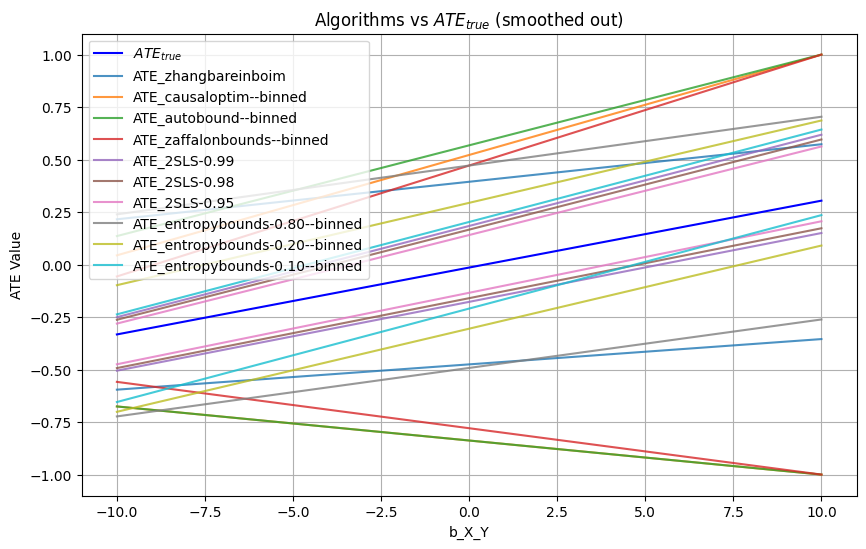

In [34]:
algs = contIV.get_algorithms('ATE')
PlottingUtil.print_bound_statistics_table(contIV.data, algs)
PlottingUtil.plot_smoothed_query_vs_bounds(contIV.data, 'ATE', algs)

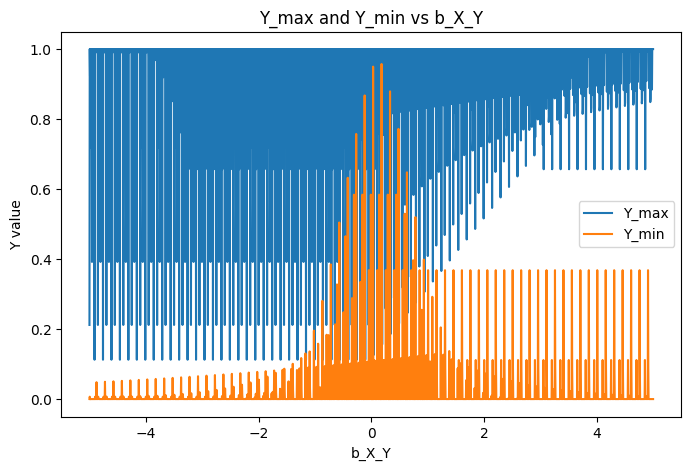

In [107]:
import matplotlib.pyplot as plt

y_label = 'Y'
plt.figure(figsize=(8, 5))
plt.plot(data['b_X_Y'], data[f'{y_label}_max'], label=f'{y_label}_max')
plt.plot(data['b_X_Y'], data[f'{y_label}_min'], label=f'{y_label}_min')
# plt.plot(data['b_X_Y'], data[f'{y_label}_mean'], 'o-', label=f'{y_label}_mean')
plt.xlabel('b_X_Y')
plt.ylabel(f'{y_label} value')
plt.title(f'{y_label}_max and {y_label}_min vs b_X_Y')
plt.legend()
plt.show()

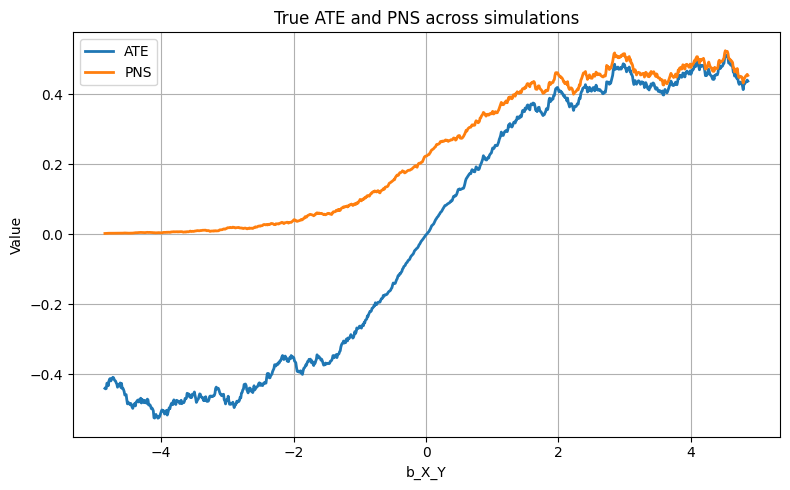

In [49]:
data = BinaryIV.generate_data_rolling_ate(1000, b_lower=-5, b_upper=5)

PlottingUtil.plot_ate_pns(data, window=30)